In [ ]:
!pip install ruwordnet
!ruwordnet download
from ruwordnet import RuWordNet

In [ ]:
!pip uninstall spacy -y
!pip install -U spacy>=3.0
!python -m spacy download ru_core_news_md
import spacy
nlp = spacy.load('ru_core_news_md')

In [ ]:
import nltk
nltk.download ('punkt')
from nltk.tokenize import word_tokenize
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/Master's Thesis/data/book1.txt"
text = open(path, encoding='utf-8').read()

In [8]:
import chardet


class SenseCounter:

    def __init__(self, text):
        self.text = text
        self.wn = RuWordNet()

    def detect_encoding(self, text):
        result = chardet.detect(text)
        return result['encoding']


    def count_senses(self, product=False):
        encoding = self.detect_encoding(self.text)
        document = word_tokenize(self.text, language='russian', encoding=encoding)
        dict_senses = {}
        for word in document:
            dict_senses[word] = []
            for sense in self.wn.get_senses(word):
                dict_senses[word].append(sense)

        sense_amount = {}
        for key, val in dict_senses.items():
            sense_amount[key] = len(val)

        only_multiples = {}
        for key, val in sense_amount.items():
            if val > 1:
                only_multiples[key] = val

        multiple_words_amount = len(only_multiples)
        len_tokens = len(document)

        if product == False:
            print(multiple_words_amount / len_tokens)
        else:
            values = [val for val in sense_amount.values() if val > 1]
            if values:
                prod = math.prod(values)
                print(math.log10(prod // len_tokens))
            else:
                print(0)



In [ ]:
first_text = SenseCounter(text)
first_text.count_senses(product=True)

In [ ]:
import os
import chardet
from nltk.tokenize import word_tokenize
import math

nltk.download('punkt')

class SenseCounter:

    def __init__(self, text):
        self.text = text
        self.wn = RuWordNet()

    def detect_encoding(self, text):
        result = chardet.detect(text.encode())
        return result['encoding']


    def count_senses(self, product=False):
        encoding = self.detect_encoding(self.text)
        document = word_tokenize(self.text, language='russian')
        dict_senses = {}
        for word in document:
            dict_senses[word] = []
            for sense in self.wn.get_senses(word):
                dict_senses[word].append(sense)

        sense_amount = {}
        for key, val in dict_senses.items():
            sense_amount[key] = len(val)

        only_multiples = {}
        for key, val in sense_amount.items():
            if val > 1:
                only_multiples[key] = val

        multiple_words_amount = len(only_multiples)
        len_tokens = len(document)
        print("=MULTIPLES=", multiple_words_amount)

        if product == False:
            print(multiple_words_amount / len_tokens)
        else:
            values = [val for val in sense_amount.values() if val > 1]
            if values:
                prod = math.prod(values)
                print(math.log10(prod // len_tokens))
            else:
                print(0)

# Путь к папке с учебниками
folder_path = "/content/drive/MyDrive/Thesis/data/texts"

for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith(".txt"):
            print("FILE IS", filename)
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                text = file.read().decode('utf-8')
                init_class = SenseCounter(text)
                init_class.count_senses(product=True)
                init_class.count_senses(product=False)


In [22]:
form = [3,4,6,7,5,9,2,5,5,5,3, 4,2,7, 2, 2, 2, 7, 7, 9, 5, 5, 5, 4, 3, 4, 3, 3 ]
multiples = [728, 1018, 1664, 2246, 1539, 1377, 596, 596, 2907, 791, 1400, 1402, 862, 503, 1610, 733, 634, 1022, 2007, 1719, 1320, 2616, 2188, 1111, 1112, 1243, 1220, 1925]


In [24]:
form = [3, 4, 6, 7, 5, 9, 2, 5, 5, 5, 3, 4, 2, 7, 2, 2, 2, 7, 7, 9, 5, 5, 5, 4, 3, 4, 3, 3]
multiples = [728, 1018, 1664, 2246, 1539, 1377, 596, 596, 2907, 791, 1400, 1402, 862, 503, 1610, 733, 634, 1022, 2007, 1719, 1320, 2616, 2188, 1111, 1112, 1243, 1220, 1925]

# Создание словаря для группировки классов и количества слов
class_dict = {}
for class_num, count in zip(form, multiples):
    if class_num in class_dict:
        class_dict[class_num].append(count)
    else:
        class_dict[class_num] = [count]

# Вычисление среднего значения для каждого класса
class_averages = {}
for class_num, counts in class_dict.items():
    average = sum(counts) / len(counts)
    class_averages[class_num] = average

# Вывод результатов
for class_num, average in class_averages.items():
    print(f"Класс {class_num}: среднее количество слов - {average:.2f}")


Класс 3: среднее количество слов - 1277.00
Класс 4: среднее количество слов - 1193.50
Класс 6: среднее количество слов - 1664.00
Класс 7: среднее количество слов - 1444.50
Класс 5: среднее количество слов - 1708.14
Класс 9: среднее количество слов - 1548.00
Класс 2: среднее количество слов - 887.00


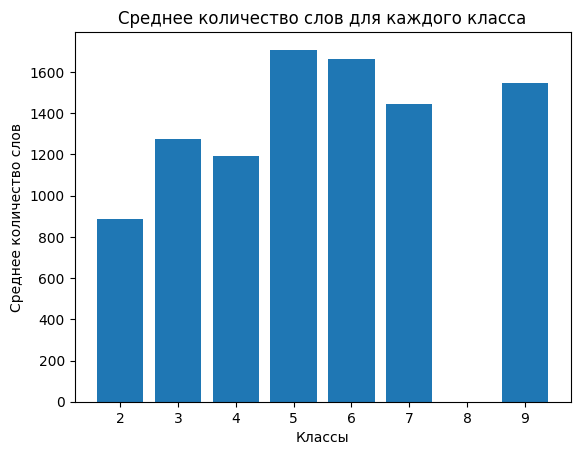

In [25]:
import matplotlib.pyplot as plt

form = [3, 4, 6, 7, 5, 9, 2, 5, 5, 5, 3, 4, 2, 7, 2, 2, 2, 7, 7, 9, 5, 5, 5, 4, 3, 4, 3, 3]
multiples = [728, 1018, 1664, 2246, 1539, 1377, 596, 596, 2907, 791, 1400, 1402, 862, 503, 1610, 733, 634, 1022, 2007, 1719, 1320, 2616, 2188, 1111, 1112, 1243, 1220, 1925]

class_dict = {}
for class_num, count in zip(form, multiples):
    if class_num in class_dict:
        class_dict[class_num].append(count)
    else:
        class_dict[class_num] = [count]

class_averages = {}
for class_num, counts in class_dict.items():
    average = sum(counts) / len(counts)
    class_averages[class_num] = average

# Построение столбчатой диаграммы
class_nums = list(class_averages.keys())
averages = list(class_averages.values())

plt.bar(class_nums, averages)
plt.xlabel('Классы')
plt.ylabel('Среднее количество слов')
plt.title('Среднее количество слов для каждого класса')
plt.show()


In [26]:
form = [3, 4, 6, 7, 5, 9, 2, 5, 5, 5, 3, 4, 2, 7, 2, 2, 2, 7, 7, 9, 5, 5, 5, 4, 3, 4, 3, 3]
multiples = [728, 1018, 1664, 2246, 1539, 1377, 596, 596, 2907, 791, 1400, 1402, 862, 503, 1610, 733, 634, 1022, 2007, 1719, 1320, 2616, 2188, 1111, 1112, 1243, 1220, 1925]

class_dict = {}
for class_num, count in zip(form, multiples):
    if class_num in class_dict:
        class_dict[class_num].append(count)
    else:
        class_dict[class_num] = [count]

class_min_max = {}
for class_num, counts in class_dict.items():
    class_min_max[class_num] = {
        'минимальное количество слов': min(counts),
        'максимальное количество слов': max(counts)
    }

# Вывод результатов
for class_num, counts in class_min_max.items():
    print(f"Класс {class_num}:")
    print(f"Минимальное количество слов: {counts['минимальное количество слов']}")
    print(f"Максимальное количество слов: {counts['максимальное количество слов']}")
    print()


Класс 3:
Минимальное количество слов: 728
Максимальное количество слов: 1925

Класс 4:
Минимальное количество слов: 1018
Максимальное количество слов: 1402

Класс 6:
Минимальное количество слов: 1664
Максимальное количество слов: 1664

Класс 7:
Минимальное количество слов: 503
Максимальное количество слов: 2246

Класс 5:
Минимальное количество слов: 596
Максимальное количество слов: 2907

Класс 9:
Минимальное количество слов: 1377
Максимальное количество слов: 1719

Класс 2:
Минимальное количество слов: 596
Максимальное количество слов: 1610



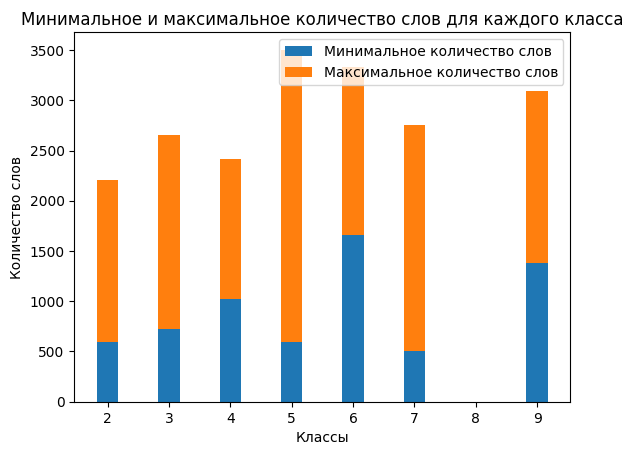

In [27]:
import matplotlib.pyplot as plt

form = [3, 4, 6, 7, 5, 9, 2, 5, 5, 5, 3, 4, 2, 7, 2, 2, 2, 7, 7, 9, 5, 5, 5, 4, 3, 4, 3, 3]
multiples = [728, 1018, 1664, 2246, 1539, 1377, 596, 596, 2907, 791, 1400, 1402, 862, 503, 1610, 733, 634, 1022, 2007, 1719, 1320, 2616, 2188, 1111, 1112, 1243, 1220, 1925]

class_dict = {}
for class_num, count in zip(form, multiples):
    if class_num in class_dict:
        class_dict[class_num].append(count)
    else:
        class_dict[class_num] = [count]

class_min_max = {}
for class_num, counts in class_dict.items():
    class_min_max[class_num] = {
        'минимальное количество слов': min(counts),
        'максимальное количество слов': max(counts)
    }

# Создание списков для построения графика
class_nums = list(class_min_max.keys())
min_counts = [counts['минимальное количество слов'] for counts in class_min_max.values()]
max_counts = [counts['максимальное количество слов'] for counts in class_min_max.values()]

# Построение графика
width = 0.35  # Ширина столбцов
fig, ax = plt.subplots()
bar1 = ax.bar(class_nums, min_counts, width, label='Минимальное количество слов')
bar2 = ax.bar(class_nums, max_counts, width, label='Максимальное количество слов', bottom=min_counts)

ax.set_xlabel('Классы')
ax.set_ylabel('Количество слов')
ax.set_title('Минимальное и максимальное количество слов для каждого класса')
ax.legend()

plt.show()
